In [1]:
#  import sys
#  !{sys.executable} -m pip install pandas
#  !{sys.executable} -m pip install numpy
#  !{sys.executable} -m pip install matplotlib
#  !{sys.executable} -m pip install sklearn
#  !{sys.executable} -m pip install scipy
#  !{sys.executable} -m pip install kneed
# !{sys.executable} -m pip install seaborn

In [95]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from __future__ import print_function

In [46]:
dataset = pd.read_csv(r"MoviesOnStreamingPlatforms_updated.csv")
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


# Prečišćavanje dataseta

## brisanje nepotpunih vrsta

In [47]:
dataset.dropna(inplace=True)
dataset.reset_index(drop=True, inplace=True)

In [48]:
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


## konverzija atributa Year u kategoričke vrednosti. 

In [49]:
dataset.Year=pd.to_numeric(dataset.Year)
for i in range(dataset.shape[0]):
    if dataset.Year[i]<1990:
        dataset.Year[i]=0
    else:
        dataset.Year[i]=1

<ipython-input-49-eba6b6ab8a2a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Year[i]=1
<ipython-input-49-eba6b6ab8a2a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Year[i]=0


In [50]:
dataset.head()


,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,1,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,1,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,0,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [51]:
runtime_mean = dataset.Runtime.mean()
dataset['Runtime']=pd.to_numeric(dataset['Runtime'],errors='coerce')
for i in range(dataset.shape[0]):
    if dataset.Runtime[i]<=runtime_mean:
        dataset.Runtime[i]=0
    else:
        dataset.Runtime[i]=1

<ipython-input-51-16c93985c5e6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Runtime[i]=1
<ipython-input-51-16c93985c5e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Runtime[i]=0


In [52]:
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,1,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",1.0
1,1,2,The Matrix,1,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,1.0
2,2,3,Avengers: Infinity War,1,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,1.0
3,3,4,Back to the Future,0,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,1.0
4,4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,1.0


In [53]:
def clean(column_name):
    """This function takes a column from the dataframe and splits two elements
       if they are separated by a comma.
       For ex. in Actors column there might be values such as Christian Bale, Morgan Freeman.
       This will separate these two actors and store them individually in a list."""
    name = set()
    for name_string in dataset[column_name]:
        name.update(name_string.split(','))
    name = sorted(name)
    return name


def top(column_name):
    """This function takes its input as name of the column and returns a sorted list of the
       elements which occur very frequently in that column in descending order."""

    name = clean(column_name)
    dummy_name = pd.DataFrame()
    for n in name:
        dummy_name[n] = [int(n in nm.split(',')) for nm in dataset[column_name]]

    namelist = [n for n in name]
    nlt = dummy_name[namelist].sum()
    nlt = nlt.sort_values(axis=0, ascending=False)
    return nlt.index


def plot_column(column_name, n_elem_display=0):
    """ This function is used to plot a bar graph of a column of the dataframe.
        It takes its argument as name of column and number of elements to display and
        return a bar graph of the user defined number of top elements which occur
        frequently in that column."""

    name = clean(column_name)
    dummy_name = pd.DataFrame()
    for n in name:
        dummy_name[n] = [int(n in nm.split(',')) for nm in dataset[column_name]]

    namelist = [n for n in name]
    nlt = dummy_name[namelist].sum()
    nlt = nlt.sort_values(axis=0, ascending=False)
    if n_elem_display != 0:
        return nlt[:n_elem_display].plot(kind="bar", figsize=(10, 10))
    else:
        return nlt[:].plot(kind="bar", figsize=(10, 5))

<AxesSubplot:>

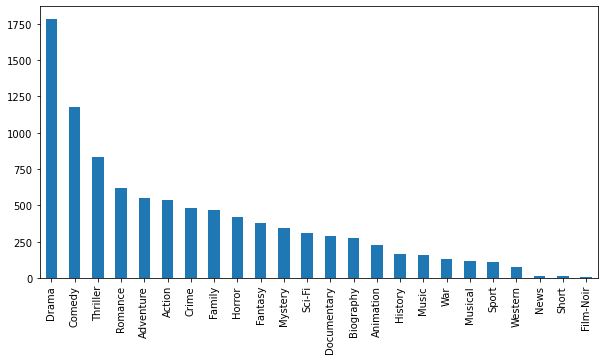

In [54]:
plot_column('Genres')

In [55]:
genres=clean('Genres')
for genre in genres:
    dataset["Genre:"+genre] = [int(genre in g.split(',')) for g in dataset.Genres]

In [56]:
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,Genre:Musical,Genre:Mystery,Genre:News,Genre:Romance,Genre:Sci-Fi,Genre:Short,Genre:Sport,Genre:Thriller,Genre:War,Genre:Western
0,0,1,Inception,1,13+,8.8,87%,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,2,The Matrix,1,18+,8.7,87%,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,3,Avengers: Infinity War,1,13+,8.5,84%,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,4,Back to the Future,0,7+,8.5,96%,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97%,1,0,1,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

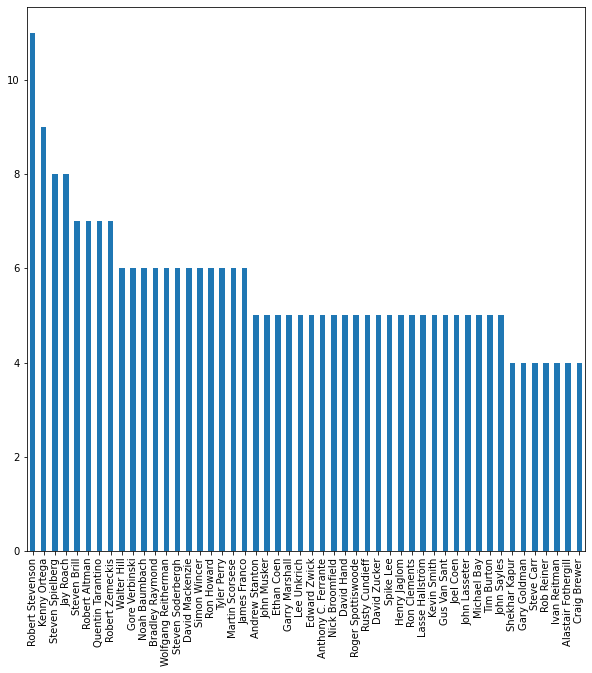

In [58]:
plot_column('Directors',50)

In [59]:
directors=top('Directors')
    
for director in directors[:50]:
    dataset["Director:"+director] = [int(director in d.split(',')) for d in dataset.Directors]

In [60]:
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,Director:Michael Bay,Director:Tim Burton,Director:John Sayles,Director:Shekhar Kapur,Director:Gary Goldman,Director:Steve Carr,Director:Rob Reiner,Director:Ivan Reitman,Director:Alastair Fothergill,Director:Craig Brewer
0,0,1,Inception,1,13+,8.8,87%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,The Matrix,1,18+,8.7,87%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,Avengers: Infinity War,1,13+,8.5,84%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,Back to the Future,0,7+,8.5,96%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97%,1,0,1,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

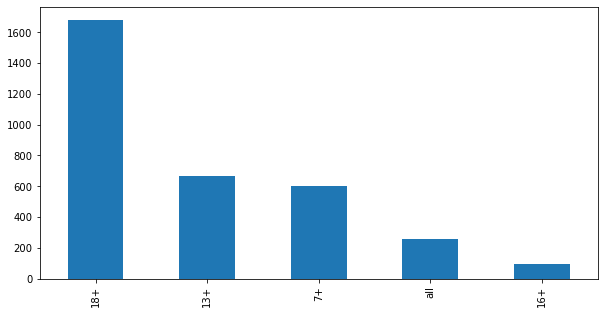

In [61]:
plot_column('Age')

In [62]:
ages=top('Age')
dataset['Age:18+']=np.nan
dataset['Age:13+']=np.nan
dataset['Age:7+']=np.nan
dataset['Age:16+']=np.nan

for i in range(dataset.shape[0]):
    if dataset.Age[i] == '18+':
        dataset['Age:18+'][i] = 1
        dataset['Age:13+'][i] = 0
        dataset['Age:7+'][i] = 0
        dataset['Age:16+'][i] = 0
        
    if dataset.Age[i] == '13+':
        dataset['Age:18+'][i] = 0
        dataset['Age:13+'][i] = 1
        dataset['Age:7+'][i] = 0
        dataset['Age:16+'][i] = 0
        
    if dataset.Age[i] == '7+':
        dataset['Age:18+'][i] = 0
        dataset['Age:13+'][i] = 0
        dataset['Age:7+'][i] = 1
        dataset['Age:16+'][i] = 0
        
    if dataset.Age[i] == '16+':
        dataset['Age:18+'][i] = 0
        dataset['Age:13+'][i] = 0
        dataset['Age:7+'][i] = 0
        dataset['Age:16+'][i] = 1
        
    if dataset.Age[i] == 'all':
        dataset['Age:18+'][i] = 1
        dataset['Age:13+'][i] = 1
        dataset['Age:7+'][i] = 1
        dataset['Age:16+'][i] = 1
dataset.head()

<ipython-input-62-b26bbbc42cae>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age:18+'][i] = 0
<ipython-input-62-b26bbbc42cae>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age:13+'][i] = 1
<ipython-input-62-b26bbbc42cae>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age:7+'][i] = 0
<ipython-input-62-b26bbbc42cae>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,Director:Gary Goldman,Director:Steve Carr,Director:Rob Reiner,Director:Ivan Reitman,Director:Alastair Fothergill,Director:Craig Brewer,Age:18+,Age:13+,Age:7+,Age:16+
0,0,1,Inception,1,13+,8.8,87%,1,0,0,...,0,0,0,0,0,0,0.0,1.0,0.0,0.0
1,1,2,The Matrix,1,18+,8.7,87%,1,0,0,...,0,0,0,0,0,0,1.0,0.0,0.0,0.0
2,2,3,Avengers: Infinity War,1,13+,8.5,84%,1,0,0,...,0,0,0,0,0,0,0.0,1.0,0.0,0.0
3,3,4,Back to the Future,0,7+,8.5,96%,1,0,0,...,0,0,0,0,0,0,0.0,0.0,1.0,0.0
4,4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97%,1,0,1,...,0,0,0,0,0,0,1.0,0.0,0.0,0.0


<AxesSubplot:>

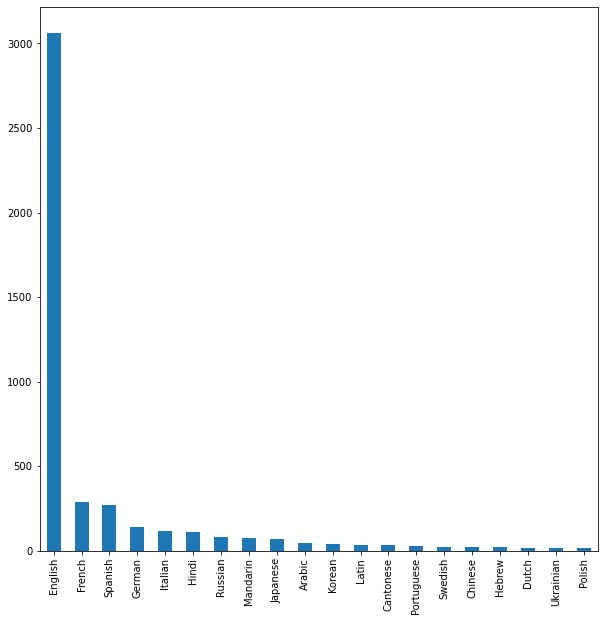

In [63]:
plot_column('Language',20)

In [64]:
languages=top('Language')
    
for language in languages[:20]:
    dataset["Language:"+language] = [int(language in d.split(',')) for d in dataset.Language]
    
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,Language:Korean,Language:Latin,Language:Cantonese,Language:Portuguese,Language:Swedish,Language:Chinese,Language:Hebrew,Language:Dutch,Language:Ukrainian,Language:Polish
0,0,1,Inception,1,13+,8.8,87%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,The Matrix,1,18+,8.7,87%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,Avengers: Infinity War,1,13+,8.5,84%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,Back to the Future,0,7+,8.5,96%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97%,1,0,1,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

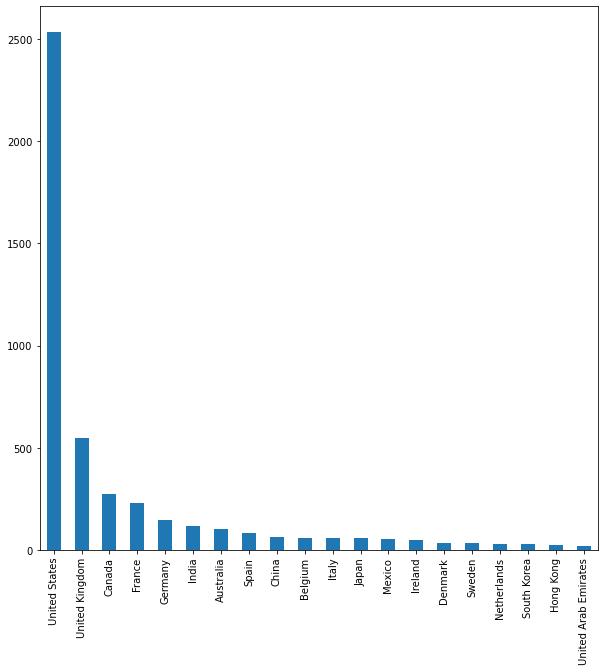

In [65]:
plot_column('Country',20)

In [66]:
countries=top('Country')
    
for country in countries[:20]:
    dataset["Country:"+country] = [int(country in d.split(',')) for d in dataset.Country]
    
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,Country:Italy,Country:Japan,Country:Mexico,Country:Ireland,Country:Denmark,Country:Sweden,Country:Netherlands,Country:South Korea,Country:Hong Kong,Country:United Arab Emirates
0,0,1,Inception,1,13+,8.8,87%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,The Matrix,1,18+,8.7,87%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,Avengers: Infinity War,1,13+,8.5,84%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,Back to the Future,0,7+,8.5,96%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97%,1,0,1,...,1,0,0,0,0,0,0,0,0,0


In [67]:
dataset.to_csv('modified_dataset.csv')

In [68]:
for i in range(dataset.shape[0]):
    dataset['Rotten Tomatoes'][i]=int(dataset['Rotten Tomatoes'][i].replace('%','')) 
dataset.head()

<ipython-input-68-0e4638026832>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Rotten Tomatoes'][i]=int(dataset['Rotten Tomatoes'][i].replace('%',''))


,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,Country:Italy,Country:Japan,Country:Mexico,Country:Ireland,Country:Denmark,Country:Sweden,Country:Netherlands,Country:South Korea,Country:Hong Kong,Country:United Arab Emirates
0,0,1,Inception,1,13+,8.8,87,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,The Matrix,1,18+,8.7,87,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,Avengers: Infinity War,1,13+,8.5,84,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,Back to the Future,0,7+,8.5,96,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97,1,0,1,...,1,0,0,0,0,0,0,0,0,0


In [69]:
rotten_tomatoes_mean = dataset['Rotten Tomatoes'].mean()
dataset['Rotten Tomatoes']=pd.to_numeric(dataset['Rotten Tomatoes'],errors='coerce')
for i in range(dataset.shape[0]):
    if dataset['Rotten Tomatoes'][i]<=runtime_mean:
        dataset['Rotten Tomatoes'][i]=0
    else:
        dataset['Rotten Tomatoes'][i]=1

<ipython-input-69-556c4e0bd8f0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Rotten Tomatoes'][i]=0


In [70]:
imdb_mean = dataset['IMDb'].mean()
dataset['IMDb']=pd.to_numeric(dataset['IMDb'],errors='coerce')
for i in range(dataset.shape[0]):
    if dataset['IMDb'][i]<=imdb_mean:
        dataset['IMDb'][i]=0
    else:
        dataset['IMDb'][i]=1

<ipython-input-70-542195021de4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['IMDb'][i]=1
<ipython-input-70-542195021de4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['IMDb'][i]=0


In [71]:
del dataset['Title']
del dataset['Age']
del dataset['Directors']
del dataset['Genres']
del dataset['Country']
del dataset['Language']
del dataset['ID']
# del dataset['Unnamed: 0']

dataset.head()

,Unnamed: 0,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Runtime,...,Country:Italy,Country:Japan,Country:Mexico,Country:Ireland,Country:Denmark,Country:Sweden,Country:Netherlands,Country:South Korea,Country:Hong Kong,Country:United Arab Emirates
0,0,1,1.0,0,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1.0,0,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1.0,0,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,1.0,0,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,1.0,0,1,0,1,0,0,1.0,...,1,0,0,0,0,0,0,0,0,0


In [72]:
dataset.describe()

,Unnamed: 0,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Runtime,...,Country:Italy,Country:Japan,Country:Mexico,Country:Ireland,Country:Denmark,Country:Sweden,Country:Netherlands,Country:South Korea,Country:Hong Kong,Country:United Arab Emirates
count,3301.000000,3301.000000,3301.000000,3301.0,3301.000000,3301.000000,3301.000000,3301.000000,3301.0,3301.000000,...,3301.000000,3301.000000,3301.000000,3301.000000,3301.00000,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000
mean,5239.267798,0.871251,0.524387,0.0,0.302939,0.129658,0.545895,0.101181,0.0,0.425023,...,0.017570,0.017267,0.015753,0.014541,0.01030,0.009694,0.008785,0.008179,0.007876,0.005453
std,4479.389204,0.334973,0.499481,0.0,0.459598,0.335977,0.497965,0.301615,0.0,0.494421,...,0.131404,0.130286,0.124537,0.119724,0.10098,0.097995,0.093331,0.090083,0.088412,0.073653
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1298.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4781.000000,1.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6519.000000,1.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16705.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


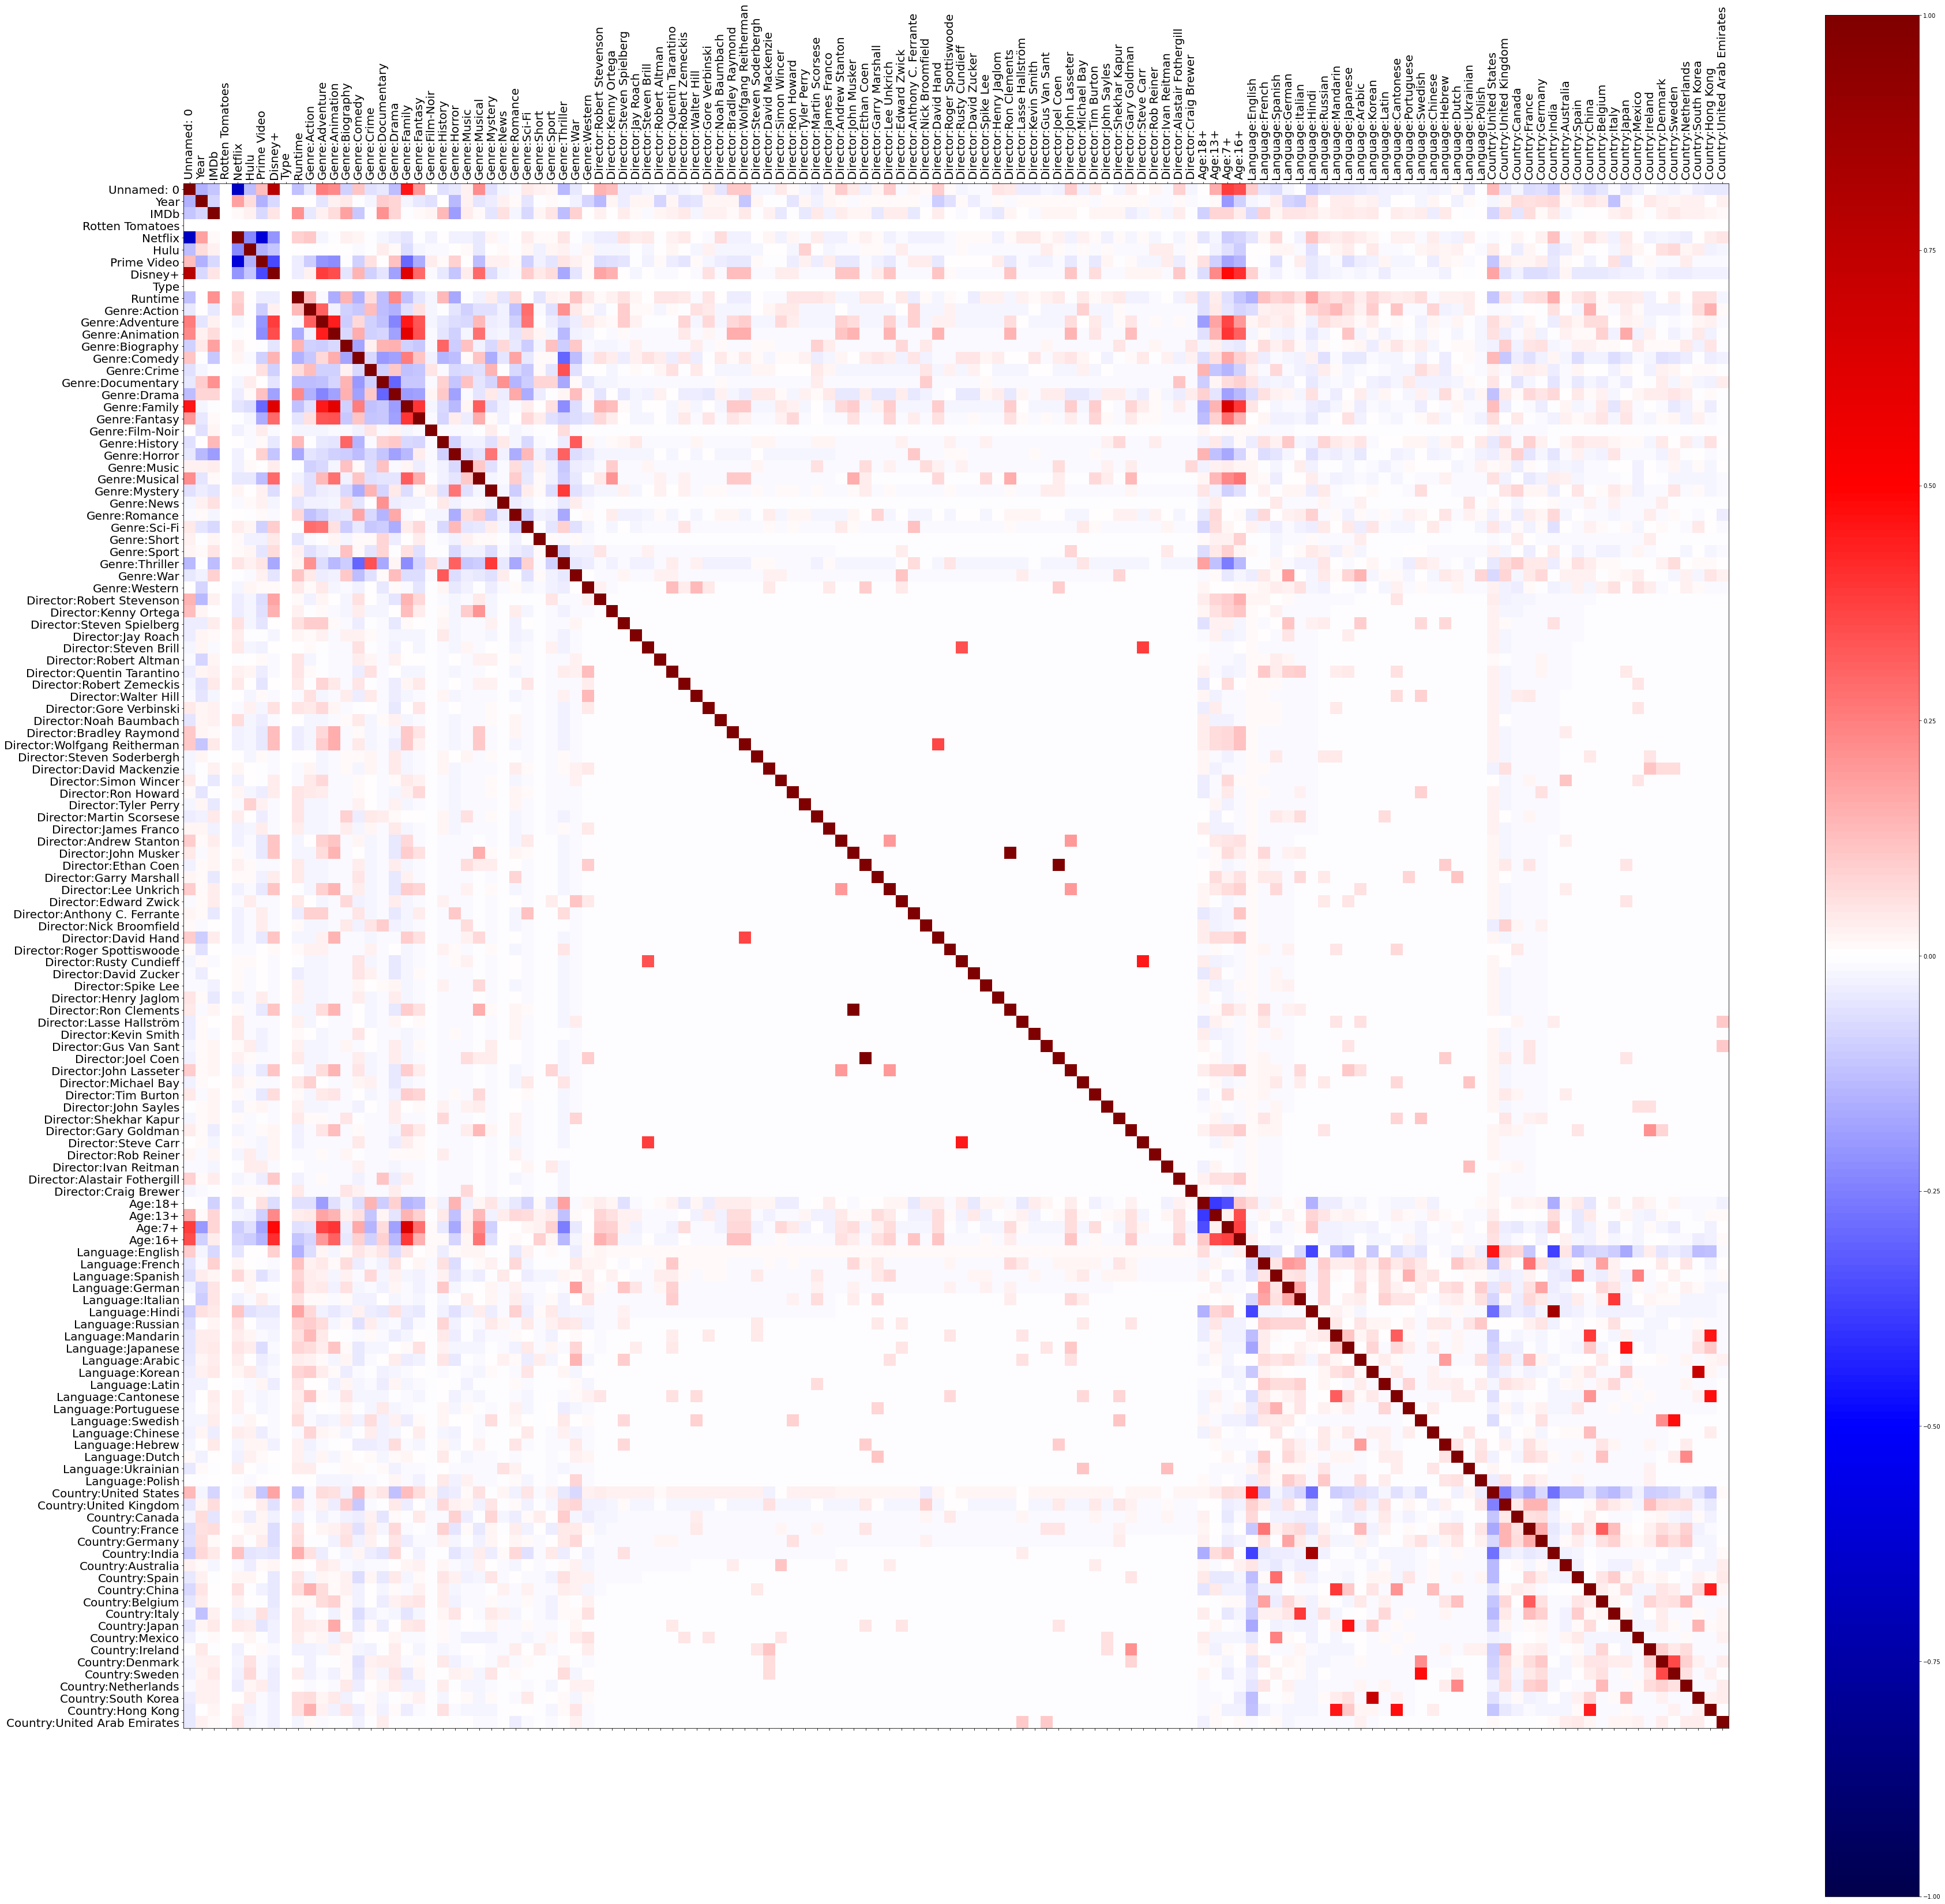

In [73]:
corr = dataset.corr()
fig = plt.figure(figsize=(60,60))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='seismic', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataset.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns, fontsize = 20)
ax.set_yticklabels(dataset.columns, fontsize = 20)
plt.show()

In [74]:
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(dataset)
kmeans.predict(dataset)

array([1, 1, 1, ..., 0, 0, 0])

In [77]:
labels = kmeans.labels_
clusters = kmeans.cluster_centers_
print("----Labels:----")
print(labels)
# print("----Cluters:----")
# print(clusters)

----Labels:----
[1 1 1 ... 0 0 0]


In [84]:
davies_bouldin_score = davies_bouldin_score(dataset, labels)
print(davies_bouldin_score)

TypeError: 'numpy.float64' object is not callable

In [85]:
#elbow algorithm
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    distortions.append(kmeanModel.inertia_)

kl = KneeLocator(range(1, 10), distortions, curve="convex", direction="decreasing")
num_clusters = kl.elbow
print(num_clusters)

3


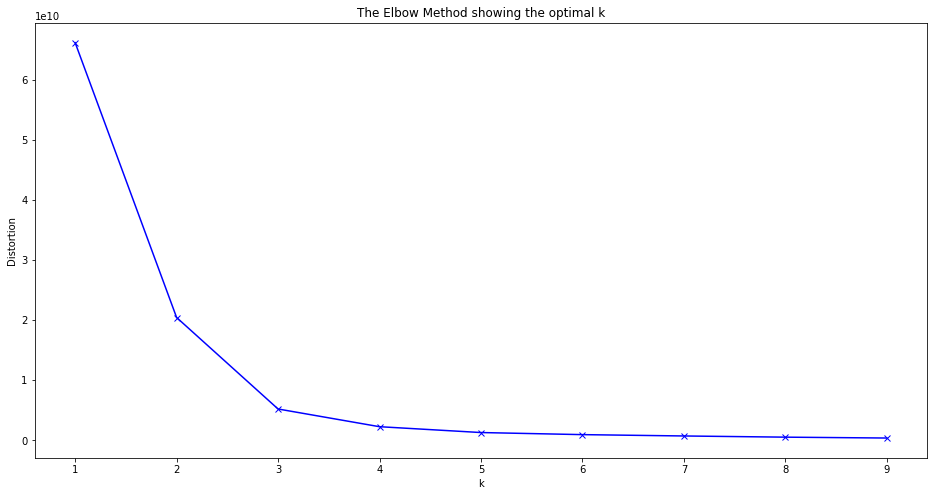

In [86]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [87]:
#silhouette algorithm
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
K = range(2,11)
scores = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(dataset)
    score = silhouette_score(dataset, kmeans.labels_)
    scores.append(score)
    silhouette_coefficients.append(score)

num_clusters = silhouette_coefficients.index(max(silhouette_coefficients)) + 2
print(score)
print(num_clusters)

0.6295671314200039
2


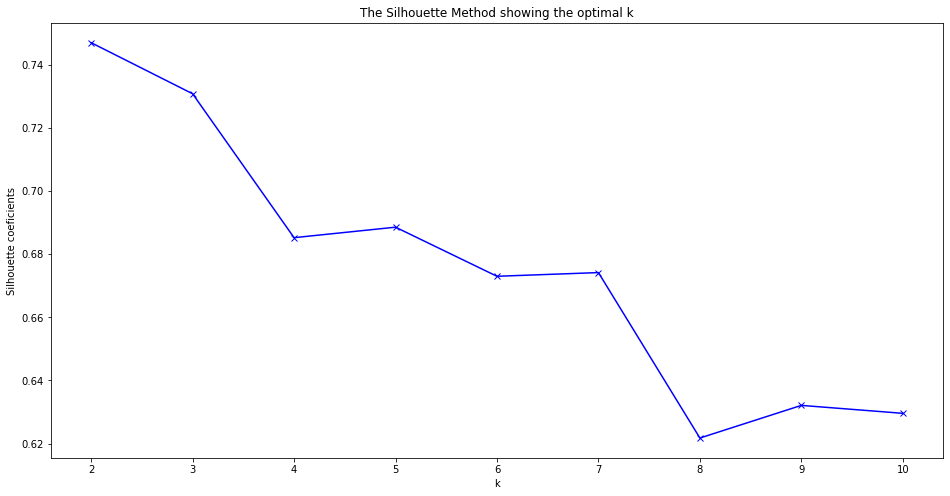

In [88]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouette_coefficients, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette coeficients')
plt.title('The Silhouette Method showing the optimal k')
plt.show()

### Redukcija dimenzionalnosti

In [91]:
dataset.dropna(inplace=True)
dataset.reset_index(drop=True, inplace=True)

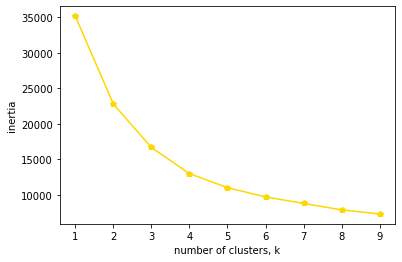

In [92]:
X_std = StandardScaler().fit_transform(dataset)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_std)
PCA_components = pd.DataFrame(principalComponents)
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()


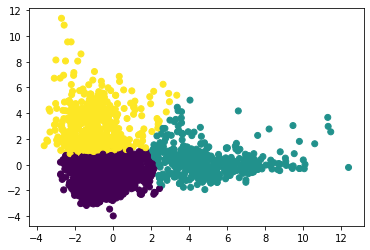

In [93]:
model = KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

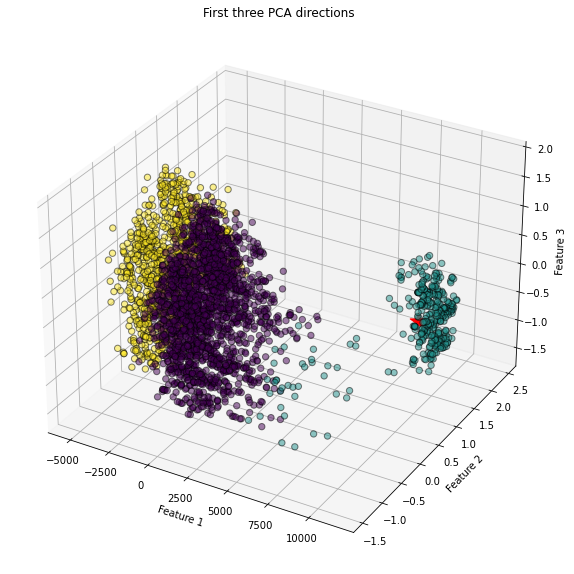

In [94]:
pca_ = PCA(n_components=3)
X_Demo_fit_pca = pca_.fit_transform(dataset)

kmeans_PCA = KMeans(n_clusters=3, init='k-means++', max_iter= 300, n_init= 10, random_state= 3)

y_kmeans_PCA = kmeans_PCA.fit_predict(X_Demo_fit_pca)
y_kmeans_PCA

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_Demo_fit_pca[:,0],X_Demo_fit_pca[:,1],X_Demo_fit_pca[:,2], 
            c=y_kmeans_PCA, cmap='viridis',
            edgecolor='k', s=40, alpha = 0.5)


ax.set_title("First three PCA directions")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.dist = 10

ax.scatter(kmeans_PCA.cluster_centers_[:,0], kmeans_PCA.cluster_centers_[:,1], 
           kmeans_PCA.cluster_centers_[:,2], 
           s = 300, c = 'r', marker='*', label = 'Centroid')

plt.autoscale(enable=True, axis='x', tight=True)    

plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# x = np.array(X_std['Feature1'])
# y = np.array(X_std['Feature2'])
# z = np.array(X_std['Feature3'])

# ax.scatter(x,y,z, marker="s", c=["r", "g","b"], s=40, cmap="RdBu")

# plt.show()

# #print(X_std)